In [1]:
import os
import glob

# Define the file types to delete (adjust extensions if needed)
files_to_delete = ["*.pkl", "*.csv", "*.xlsx"]  # Adjust as needed

# Loop through each file type and delete them
for file_type in files_to_delete:
    for file in glob.glob(file_type):  # Find all matching files
        try:
            os.remove(file)  # Delete the file
            print(f"Deleted: {file}")
        except Exception as e:
            print(f"Error deleting {file}: {e}")

print("\n✅ All saved models, scalers, and files have been deleted!")

Deleted: manual_test_sample_raw.csv

✅ All saved models, scalers, and files have been deleted!


Importing Libries

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model Training & Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Model Evaluation Metrics
from sklearn.metrics import (
    precision_score, recall_score, f1_score, average_precision_score, precision_recall_curve
)
from sklearn.metrics import classification_report


# Ensemble Learning
from sklearn.ensemble import VotingClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Save the model
import joblib
import json

# analyze the impact of each feature on the model's decision-making process.
import shap

Load and Explore the Dataset (Exploratory Data Analysis (EDA)

In [3]:
# Load dataset

credit_card_fraud = pd.read_csv("C:\\Users\\USER\\Downloads\\creditcard.csv")

In [4]:
# Display the first few rows

credit_card_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Display the last few rows

credit_card_fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# Check dataset shape

credit_card_fraud.shape

(284807, 31)

In [7]:
# Check class distribution

credit_card_fraud["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# exploring the datatype of each column

credit_card_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Check for missing values

credit_card_fraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Check basic statistics of the dataset

credit_card_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# imbalance ratio of fruad cases and normal cases

fraud_cases = credit_card_fraud[credit_card_fraud["Class"] == 1]
normal_cases = credit_card_fraud[credit_card_fraud["Class"] == 0]

imbalance_ratio = len(normal_cases) / len(fraud_cases)
print(f"Imbalance Ratio: {imbalance_ratio:.4f}")

Imbalance Ratio: 577.8760


Split Features & Target

We separate the features from the target variable and split the data into training and testing sets.

In [13]:
# Randomly sample 10 records from the test set (before scaling)
sample_indices = X_test.sample(10, random_state=42).index
X_manual_sample = X_test.loc[sample_indices]
y_manual_sample = y_test.loc[sample_indices]

# Save the original (unscaled) test samples for manual checking
X_manual_sample.to_csv("manual_test_sample_raw.csv", index=False)

In [40]:
# Sample 5 records from Class 0
class_0_samplessss = X_test[y_test == 0].sample(30, random_state=42)

# Sample 5 records from Class 1
class_1_samplessss = X_test[y_test == 1].sample(30, random_state=42)

# Combine the samples
X_manual_sampledssd = pd.concat([class_0_samplessss, class_1_samplessss])

# Get the corresponding labels
y_manual_sampledssd = y_test.loc[X_manual_sampledssd.index]

# Save the original (unscaled) test samples for manual checking
X_manual_sampledssd.to_csv("manual_test_sample_rawdssd.csv", index=False)
y_manual_sampledssd.to_csv("manual_test_sample_labelsdssd.csv", index=False)

# Display the sampled data
print("Sampled Features:")
print(X_manual_sampledssd)
print("\nSampled Labels:")
print(y_manual_sampledssd)

Sampled Features:
            Time         V1         V2         V3        V4         V5  \
197288  131941.0   1.427126  -0.919876  -3.165507  1.378848   0.867670   
175745  122469.0   1.808834  -1.333030  -0.556548 -0.165515  -1.388384   
29594    35541.0   1.028807  -0.167460   1.344620  1.649794  -0.717662   
195743  131201.0  -1.824223  -0.620021  -0.467199 -0.407000  -0.476089   
234355  147939.0   1.984241   0.115783  -1.659127  0.440728   0.174926   
201844  134059.0  -3.146311   1.598155  -0.963120 -0.404630  -0.100386   
5560      5680.0  -0.348230   0.397211   2.349409  1.173396  -0.133879   
170199  120066.0  -7.880589   6.550019  -6.172591 -0.769679  -4.553408   
98802    66824.0   1.185228   0.363215   0.413729  1.251028  -0.243935   
267610  162849.0   2.038329  -0.114510  -1.210975  0.198567   0.147862   
104081   68905.0   1.174641  -0.084897  -0.256067 -0.219802  -0.149242   
279009  168586.0  -0.496714   2.008929  -2.410261 -0.260957   2.014841   
180171  124413.0  -0

In [14]:
# Ensure indexes of X and y are correctly aligned
assert X.index.equals(y.index), "Mismatch between X and y indexes!"

In [15]:
# Check index alignment for training set
assert X_train.index.equals(y_train.index), "Mismatch in X_train and y_train indexes!"

# Check index alignment for test set
assert X_test.index.equals(y_test.index), "Mismatch in X_test and y_test indexes!"

In [16]:
# Check test set type

print(type(X_test))  # Should be a Pandas DataFrame
print(type(y_test))  # Should be a Pandas Series

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Feature Scaling

Since our features might have different scales, we standardize them.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Individual Models

We train XGBoost, Random Forest, and Logistic Regression models.

In [18]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train_scaled, y_train)

c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:42:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LogisticRegression(random_state=42, solver='liblinear')

Evaluate Individual Models Before Tuning

In [19]:
def evaluate_model(model, X_test_scaled, y_test, threshold=0.5):
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_pr = average_precision_score(y_test, y_probs)
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'AUC-PR: {auc_pr:.4f}')

print("\n📌 XGBoost Performance:")    
evaluate_model(xgb_model, X_test_scaled, y_test)

print("\n📌 Random Forest Performance:")
evaluate_model(rf_model, X_test_scaled, y_test)

print("\n📌 Logistic Regression Performance:")
evaluate_model(log_model, X_test_scaled, y_test)



📌 XGBoost Performance:
Precision: 0.9186
Recall: 0.8061
F1-Score: 0.8587
AUC-PR: 0.8777

📌 Random Forest Performance:
Precision: 0.9412
Recall: 0.8163
F1-Score: 0.8743
AUC-PR: 0.8734

📌 Logistic Regression Performance:
Precision: 0.8289
Recall: 0.6429
F1-Score: 0.7241
AUC-PR: 0.7453


Hyperparameter Tuning

We optimize the hyperparameters of the XGBoost model using GridSearchCV

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],  
    'max_depth': [5, 7],  
    'learning_rate': [0.05, 0.1],  
    'scale_pos_weight': [1, 5, 10, 15]  # ✅ Adjust for imbalance
    #'scale_pos_weight': [10, 25, 50]
}


# ✅ Define XGBoost model with additional parameters for hyperparameter tuning
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    objective="binary:logistic",   # ✅ Correct for fraud detection
    eval_metric=["logloss", "aucpr"],  # ✅ LogLoss + AUC-PR for imbalanced data
    tree_method="hist",   # ✅ Faster training
    verbosity=1,  # ✅ Shows progress logs
    random_state=42  
)

# Define scoring metrics
scoring_metrics = {
    "F1": "f1",
    "Precision": "precision",
    "Recall": "recall",
    "AUC-PR": "average_precision"  # ✅ Optimizing for AUC-PR
}

# Perform Grid Search
grid_xgb = GridSearchCV(
    xgb_model, param_grid_xgb, cv=3, scoring=scoring_metrics, 
    n_jobs=-1, refit="AUC-PR"  # ✅ Selects best model based on AUC-PR
)

# Fit GridSearchCV using the scaled training data
grid_xgb.fit(X_train_scaled, y_train)  

# Get the best model based on AUC-PR
best_xgb = grid_xgb.best_estimator_

# Display the best hyperparameters
print("Best Parameters:", grid_xgb.best_params_)

# ✅ Display best scores for all metrics correctly
print("\nBest Scores:")
for metric in scoring_metrics.keys():  # Loop over metric names
    metric_key = f"mean_test_{metric}"  # Correct key in cv_results_
    score = grid_xgb.cv_results_[metric_key].max()  # Get the best value for each metric
    print(f"{metric}: {score:.4f}")

c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:50:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1}

Best Scores:
F1: 0.8605
Precision: 0.9538
Recall: 0.7996
AUC-PR: 0.8495


Precision-Recall Curve & Optimal Threshold Selection

We compute precision-recall scores at different thresholds and select the best one automatically.

In [21]:
# ✅ Select the Best Threshold #
# ============================ #

# Get fraud probabilities
y_probs = best_xgb.predict_proba(X_test_scaled)[:, 1]  

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1 scores, handling NaN cases
f1_scores = np.nan_to_num(2 * (precisions * recalls) / (precisions + recalls))

# Select the best threshold
best_threshold = thresholds[np.argmax(f1_scores[:-1])]  

print(f"\n✅ Best Threshold: {best_threshold:.3f}")

# ============================ #
# ✅ Evaluate All Models       #
# ============================ #

print("\n📌 XGBoost (Tuned) Performance:")
evaluate_model(best_xgb, X_test_scaled, y_test, best_threshold)

print("\n📌 Random Forest Performance:")
evaluate_model(rf_model, X_test_scaled, y_test, best_threshold)

print("\n📌 Logistic Regression Performance:")
evaluate_model(log_model, X_test_scaled, y_test, best_threshold)


✅ Best Threshold: 0.470

📌 XGBoost (Tuned) Performance:
Precision: 0.9022
Recall: 0.8469
F1-Score: 0.8737
AUC-PR: 0.8767

📌 Random Forest Performance:
Precision: 0.9310
Recall: 0.8265
F1-Score: 0.8757
AUC-PR: 0.8734

📌 Logistic Regression Performance:
Precision: 0.8312
Recall: 0.6531
F1-Score: 0.7314
AUC-PR: 0.7453


Precision-Recall vs. Decision Threshold

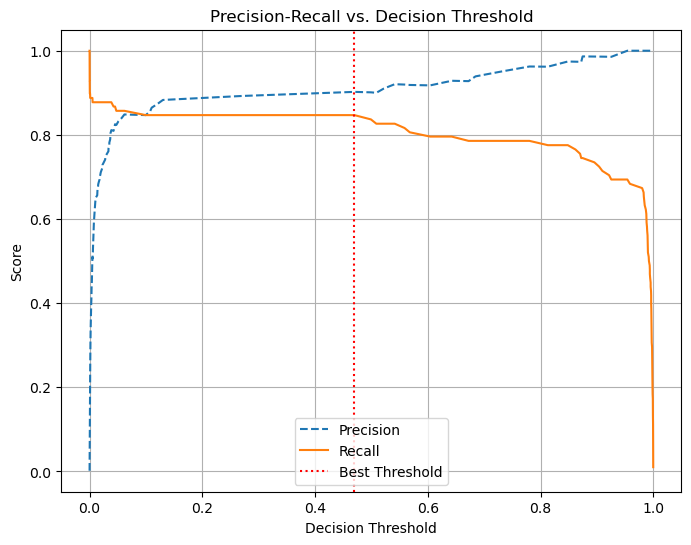

In [22]:
# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="--")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.axvline(best_threshold, color='r', linestyle=":", label="Best Threshold")  # Mark the best threshold
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Decision Threshold")
plt.legend()
plt.grid()
plt.show()

Run the Final Model Evaluation Check

In [23]:
# Function to evaluate models and return key metrics with both thresholds
def evaluate_and_print(model, X_test_scaled, y_test, threshold, model_name, is_best_threshold=True):
    """
    This function evaluates the model using a specified threshold (either best or default).
    - model: The model to evaluate (e.g., XGBoost, Random Forest, Logistic Regression)
    - X_test_scaled: The test data for prediction
    - y_test: The true labels for the test data
    - threshold: The threshold to apply for classification (best or default)
    - model_name: The name of the model (for display)
    - is_best_threshold: Whether to use the best threshold or the default threshold (0.5)
    """
    # Get predicted probabilities
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    
    # Apply the appropriate threshold: either best threshold or default (0.5)
    threshold_to_use = threshold if is_best_threshold else 0.5
    y_pred = (y_probs >= threshold_to_use).astype(int)  # Convert probabilities to binary predictions
    
    # Get evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print classification report
    print(f"\n📌 {model_name} Performance (Threshold {threshold_to_use}):")
    print(classification_report(y_test, y_pred))
    
    # Return F1-score for comparison
    return report["1"]["f1-score"]

# Define models
models = {
    "XGBoost (Tuned)": best_xgb,
    "Random Forest": rf_model,
    "Logistic Regression": log_model
}

# Store F1-scores for model selection with both thresholds
f1_scores_default = {}
f1_scores_best = {}

# Evaluate each model with both the default and best threshold
for name, model in models.items():
    f1_scores_default[name] = evaluate_and_print(model, X_test_scaled, y_test, best_threshold, name, is_best_threshold=True)  # Using best threshold
    f1_scores_best[name] = evaluate_and_print(model, X_test_scaled, y_test, best_threshold, name, is_best_threshold=False)  # Using default threshold

# Compare the F1-scores and select the best model based on both thresholds
best_model_default_threshold = max(f1_scores_default, key=f1_scores_default.get)
best_model_best_threshold = max(f1_scores_best, key=f1_scores_best.get)

print(f"\n🏆 Best Model for Deployment (Default Threshold): {best_model_default_threshold} (F1-Score: {f1_scores_default[best_model_default_threshold]:.4f}) ✅")
print(f"🏆 Best Model for Deployment (Best Threshold): {best_model_best_threshold} (F1-Score: {f1_scores_best[best_model_best_threshold]:.4f}) ✅")



📌 XGBoost (Tuned) Performance (Threshold 0.46982505917549133):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962


📌 XGBoost (Tuned) Performance (Threshold 0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.83      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


📌 Random Forest Performance (Threshold 0.46982505917549133):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accu

In [25]:
# Function to evaluate models and return key metrics
def evaluate_and_print(model, X_test_scaled, y_test, threshold, model_name):
    # Get predicted probabilities
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    
    # Apply best threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Get evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print classification report
    print(f"\n📌 {model_name} Performance:")
    print(classification_report(y_test, y_pred))
    
    # Return F1-score for comparison
    return report["1"]["f1-score"]

# Define models
models = {
    "XGBoost (Tuned)": best_xgb,
    "Random Forest": rf_model,
    "Logistic Regression": log_model
}

# Store F1-scores for model selection
f1_scores = {}

# Best threshold found earlier
for name, model in models.items():
    f1_scores[name] = evaluate_and_print(model, X_test_scaled, y_test, best_threshold, name)

# Select the best model based on F1-score
best_model_name = max(f1_scores, key=f1_scores.get)
best_model = models[best_model_name]

print(f"\n🏆 Best Model for Deployment: {best_model_name} (F1-Score: {f1_scores[best_model_name]:.4f}) ✅")



📌 XGBoost (Tuned) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962


📌 Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


📌 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0

Save Models

In [28]:
# Save the trained models
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(log_model, 'log_model.pkl')

# Save the best XGBoost model from GridSearchCV
joblib.dump(best_xgb, 'best_xgb_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

import json

# Convert best_threshold to a standard Python float
best_threshold_float = float(best_threshold)

# Save the optimal threshold
with open('best_threshold.json', 'w') as f:
    json.dump({'best_threshold': best_threshold_float}, f)

Save the Sample Data

In [27]:
# Save the sample data
X_manual_sample.to_csv('manual_test_sample.csv', index=False)
y_manual_sample.to_csv('manual_test_sample_labels.csv', index=False)

Load Trained Models

In [ ]:
import joblib

# Load the trained models
xgb_model = joblib.load('xgb_model.pkl')
rf_model = joblib.load('rf_model.pkl')
log_model = joblib.load('log_model.pkl')
best_xgb = joblib.load('best_xgb_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

import json

# Load the optimal threshold
with open('best_threshold.json', 'r') as f:
    best_threshold = json.load(f)['best_threshold']

# Use the threshold for predictions
y_pred = (y_probs >= best_threshold).astype(int)

Load the Sample Data


In [ ]:
import pandas as pd

# Load the sample data
X_manual_sample = pd.read_csv('manual_test_sample.csv')
y_manual_sample = pd.read_csv('manual_test_sample_labels.csv')

Manual Validation Code

In [ ]:
# Scale the sample data
X_manual_sample_scaled = scaler.transform(X_manual_sample)

# Predict using the best XGBoost model
y_probs = best_xgb.predict_proba(X_manual_sample_scaled)[:, 1]
y_pred = (y_probs >= best_threshold).astype(int)

# Create a DataFrame to compare actual and predicted labels
results = pd.DataFrame({
    'Actual Label': y_manual_sample['Class'],  # Assuming 'Class' is the column name for the actual labels
    'Predicted Label': y_pred,
    'Predicted Probability': y_probs
})

# Display the results
print(results)

# Evaluate the predictions
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, average_precision_score

precision = precision_score(y_manual_sample, y_pred)
recall = recall_score(y_manual_sample, y_pred)
f1 = f1_score(y_manual_sample, y_pred)
auc_pr = average_precision_score(y_manual_sample, y_probs)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-PR: {auc_pr:.4f}')

# Print classification report
print(classification_report(y_manual_sample, y_pred))


import joblib
import json
import pandas as pd

# Load the trained model
best_xgb = joblib.load('best_xgb_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Load the optimal threshold
with open('best_threshold.json', 'r') as f:
    best_threshold = json.load(f)['best_threshold']

# Load the sample data
X_manual_sample = pd.read_csv('manual_test_sample.csv')
y_manual_sample = pd.read_csv('manual_test_sample_labels.csv')

# Scale the sample data
X_manual_sample_scaled = scaler.transform(X_manual_sample)

# Generate predicted probabilities
y_probs = best_xgb.predict_proba(X_manual_sample_scaled)[:, 1]

# Apply the threshold to get binary predictions
y_pred = (y_probs >= best_threshold).astype(int)

# Compare actual and predicted labels
results = pd.DataFrame({
    'Actual Label': y_manual_sample['Class'],  # Assuming 'Class' is the column name for the actual labels
    'Predicted Label': y_pred,
    'Predicted Probability': y_probs
})

# Display the results
print(results)

# Evaluate the predictions
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, average_precision_score

precision = precision_score(y_manual_sample, y_pred)
recall = recall_score(y_manual_sample, y_pred)
f1 = f1_score(y_manual_sample, y_pred)
auc_pr = average_precision_score(y_manual_sample, y_probs)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-PR: {auc_pr:.4f}')

# Print classification report
print(classification_report(y_manual_sample, y_pred))

additional tweaking

In [33]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define the parameter space for Bayesian Optimization
param_space = {
    'max_depth': Integer(3, 10),  # Range for max_depth
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),  # Log-uniform range for learning_rate
    'n_estimators': Integer(100, 500),  # Range for n_estimators
    'subsample': Real(0.5, 1.0),  # Range for subsample
    'colsample_bytree': Real(0.5, 1.0),  # Range for colsample_bytree
    'gamma': Real(0, 5),  # Range for gamma
    'scale_pos_weight': Integer(1, 20)  # Adjust for class imbalance
}

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

# Initialize the XGBoost model
xgb_models = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Set up Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=xgb_models,
    search_spaces=param_space,
    scoring='f1',  # Use F1-score for imbalanced datasets
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  # Cross-validation
    n_iter=50,  # Number of iterations (evaluations)
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,  # Print progress
    random_state=42
)

# Fit the Bayesian Optimization
bayes_search.fit(X_train_scaled, y_train)

evaluate_model(bayes_search, X_test_scaled, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:00:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Precision: 0.8817
Recall: 0.8367
F1-Score: 0.8586
AUC-PR: 0.8570


In [38]:
# Best hyperparameters
print("Best Hyperparameters:", bayes_search.best_params_)

# Best model
best_xgbs = bayes_search.best_estimator_

# Evaluate on the validation set
y_pred = best_xgbs.predict(X_test_scaled)
y_probs = best_xgbs.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, average_precision_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_pr = average_precision_score(y_test, y_probs)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC-PR: {auc_pr:.4f}')

# Classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: OrderedDict({'colsample_bytree': 1.0, 'gamma': 0.0, 'learning_rate': 0.29999999999999993, 'max_depth': 3, 'n_estimators': 394, 'scale_pos_weight': 8, 'subsample': 0.5})
Precision: 0.8817
Recall: 0.8367
F1-Score: 0.8586
AUC-PR: 0.8570
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
# Save the best XGBoost model from BayesSearchCV
joblib.dump(best_xgbs, 'best_xgbs_model.pkl')

['best_xgbs_model.pkl']